In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('/content/drive/MyDrive/projets/classification_in_asteroseismology.csv')

In [4]:
df.head()

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275


In [5]:
df.describe()

,POP,Dnu,numax,epsilon
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,0.712288,5.774810,58.441771,0.610774
std,0.452923,2.998103,43.425561,0.342518
min,0.000000,2.500080,17.979780,0.005000
25%,0.000000,4.073160,32.924350,0.220000
50%,1.000000,4.308740,38.293160,0.815000
75%,1.000000,6.580340,70.140830,0.890000
max,1.000000,17.699430,239.648480,1.000000


In [6]:
df_y = df['POP']
df.drop('POP', axis=1, inplace=True)

In [7]:
X = df

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, test_size=0.30, random_state=42)

1. Standard scaler
2. KNN classifier

In [9]:
# Standard Scaler
scaler = StandardScaler()

In [10]:
normalized = scaler.fit_transform(X_train)

In [11]:
normalized_test = scaler.transform(X_test)

In [12]:
df_normalized = pd.DataFrame(normalized, columns=X_train.columns)

In [13]:
# KNN classifier
neigh = KNeighborsClassifier(n_neighbors=3)

In [14]:
neigh.fit(df_normalized, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = neigh.predict(normalized_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


[[ 80   8]
 [  7 206]]


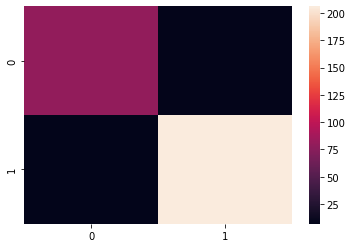

In [16]:
data = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(data=data)
print(data)